# Day 5 lab
## 1. Solving the Knapsack problem using VQE

The knapsack problem is a problem in combinatorial optimization: Given a set of items, each with a weight and a value, determine the number of each item to include in a collection so that the total weight is less than or equal to a given limit and the total value is as large as possible. It derives its name from the problem faced by someone who is constrained by a fixed-size knapsack and must fill it with the most valuable items. The problem often arises in resource allocation where the decision makers have to choose from a set of non-divisible projects or tasks under a fixed budget or time constraint, respectively.

Let's make the needed imports:

In [43]:
# BLOCK 1 - Importing libaries. A lot of new libararies here! 

from qiskit_optimization.applications import Knapsack
from qiskit.algorithms import NumPyMinimumEigensolver
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit.utils import QuantumInstance
from qiskit import Aer
from qiskit_optimization.converters import QuadraticProgramToQubo
from qiskit.algorithms import VQE
from qiskit.algorithms.optimizers import SPSA
from qiskit.circuit.library import EfficientSU2, TwoLocal
print("All libraries imported successfully!")

All libraries imported successfully!


## Part 1 - Setting up the problem

In [44]:
# BLOCK 2 - Defining the knapsack problem. We define a list of values, a list of weights, the maximum weight, and then
# put it all together into a variable called `problem' using the Knapsack function.

#values = [4, 2, 5, 10]   # list of the values of items
#weights = [3, 1, 2, 6]   # list of the weights of items
#max_weight = 10            # maximum weight capacity (knapsack capacity)

values = [4, 2, 5, 10, 3, 5, 6]   # list of the values of items
weights = [3, 1, 2, 6, 3, 3, 2]   # list of the weights of items
max_weight = 10 

knapsack_problem = Knapsack(values = values, weights = weights, max_weight = max_weight) #putting it all together

## Part 2 - Using a classical method to solve the problem

In [45]:
# BLOCK 3- Choosing the method of solving the knapsack problem. Since this is a small problem, we can check the answer we will get later with VQE
# using a classical solver. The method we will use to solve is called `NumPyMinimumEigensolver'.
# We create a variable called method, and store the method we want to use (NumPyMinimumEigensolver) in it
# Later, we will use VQE instead of the classical NumPyMinimumEigensolver.

method = NumPyMinimumEigensolver()

In [46]:
# BLOCK 4 - Using the classical solver NumPyMinimumEigensolver. 
# Run this block to use the classical solver defined in Block 2 to solve the knapsack problem defined in Block 1.
# Can you interpret what these results mean?
calc = MinimumEigenOptimizer(method)
result = calc.solve(knapsack_problem.to_quadratic_program())
print('result:\n', result)
print('\nsolution:\n', knapsack_problem.interpret(result))

result:
 optimal function value: 21.0
optimal value: [0. 0. 1. 1. 0. 0. 1.]
status: SUCCESS

solution:
 [2, 3, 6]


## Part 3 - Using VQE to solve the problem

In [47]:
# BLOCK 5 - Converting the knapsack problem to a quantum circuit, i.e., a colletion of quantum gates (or operators).
# Run this block to convert the knapsack problem to a quantum operator, and print the number of qubits used.
operator, offset = QuadraticProgramToQubo().convert(knapsack_problem.to_quadratic_program()).to_ising()
print("number of qubits =",operator.num_qubits)

number of qubits = 11


In [48]:
# BLOCK 6 - Setting up VQE. We define a QuantumInstance, which is a way of specifying which simulator we want to use.
# We define our tunable circuit for VQE. Here, we will choose EfficientSU2
# We define which classical optimizer we want to use - here we will use one called SPSA
# We tell our code to use VQE with the tunable circuit, the optimizer, and the quantum instance

qinstance = QuantumInstance(backend=Aer.get_backend('qasm_simulator'), shots=1000)

tunable_circuit = EfficientSU2(operator.num_qubits, reps=3, entanglement='full') # QUantum circuit
optimizer = SPSA(maxiter=15) # Classical optimizer

method = VQE(ansatz = tunable_circuit, optimizer = optimizer, quantum_instance = qinstance)

result:
 optimal function value: 21.0
optimal value: [0. 0. 1. 1. 0. 0. 1.]
status: SUCCESS

solution:
 [2, 3, 6]


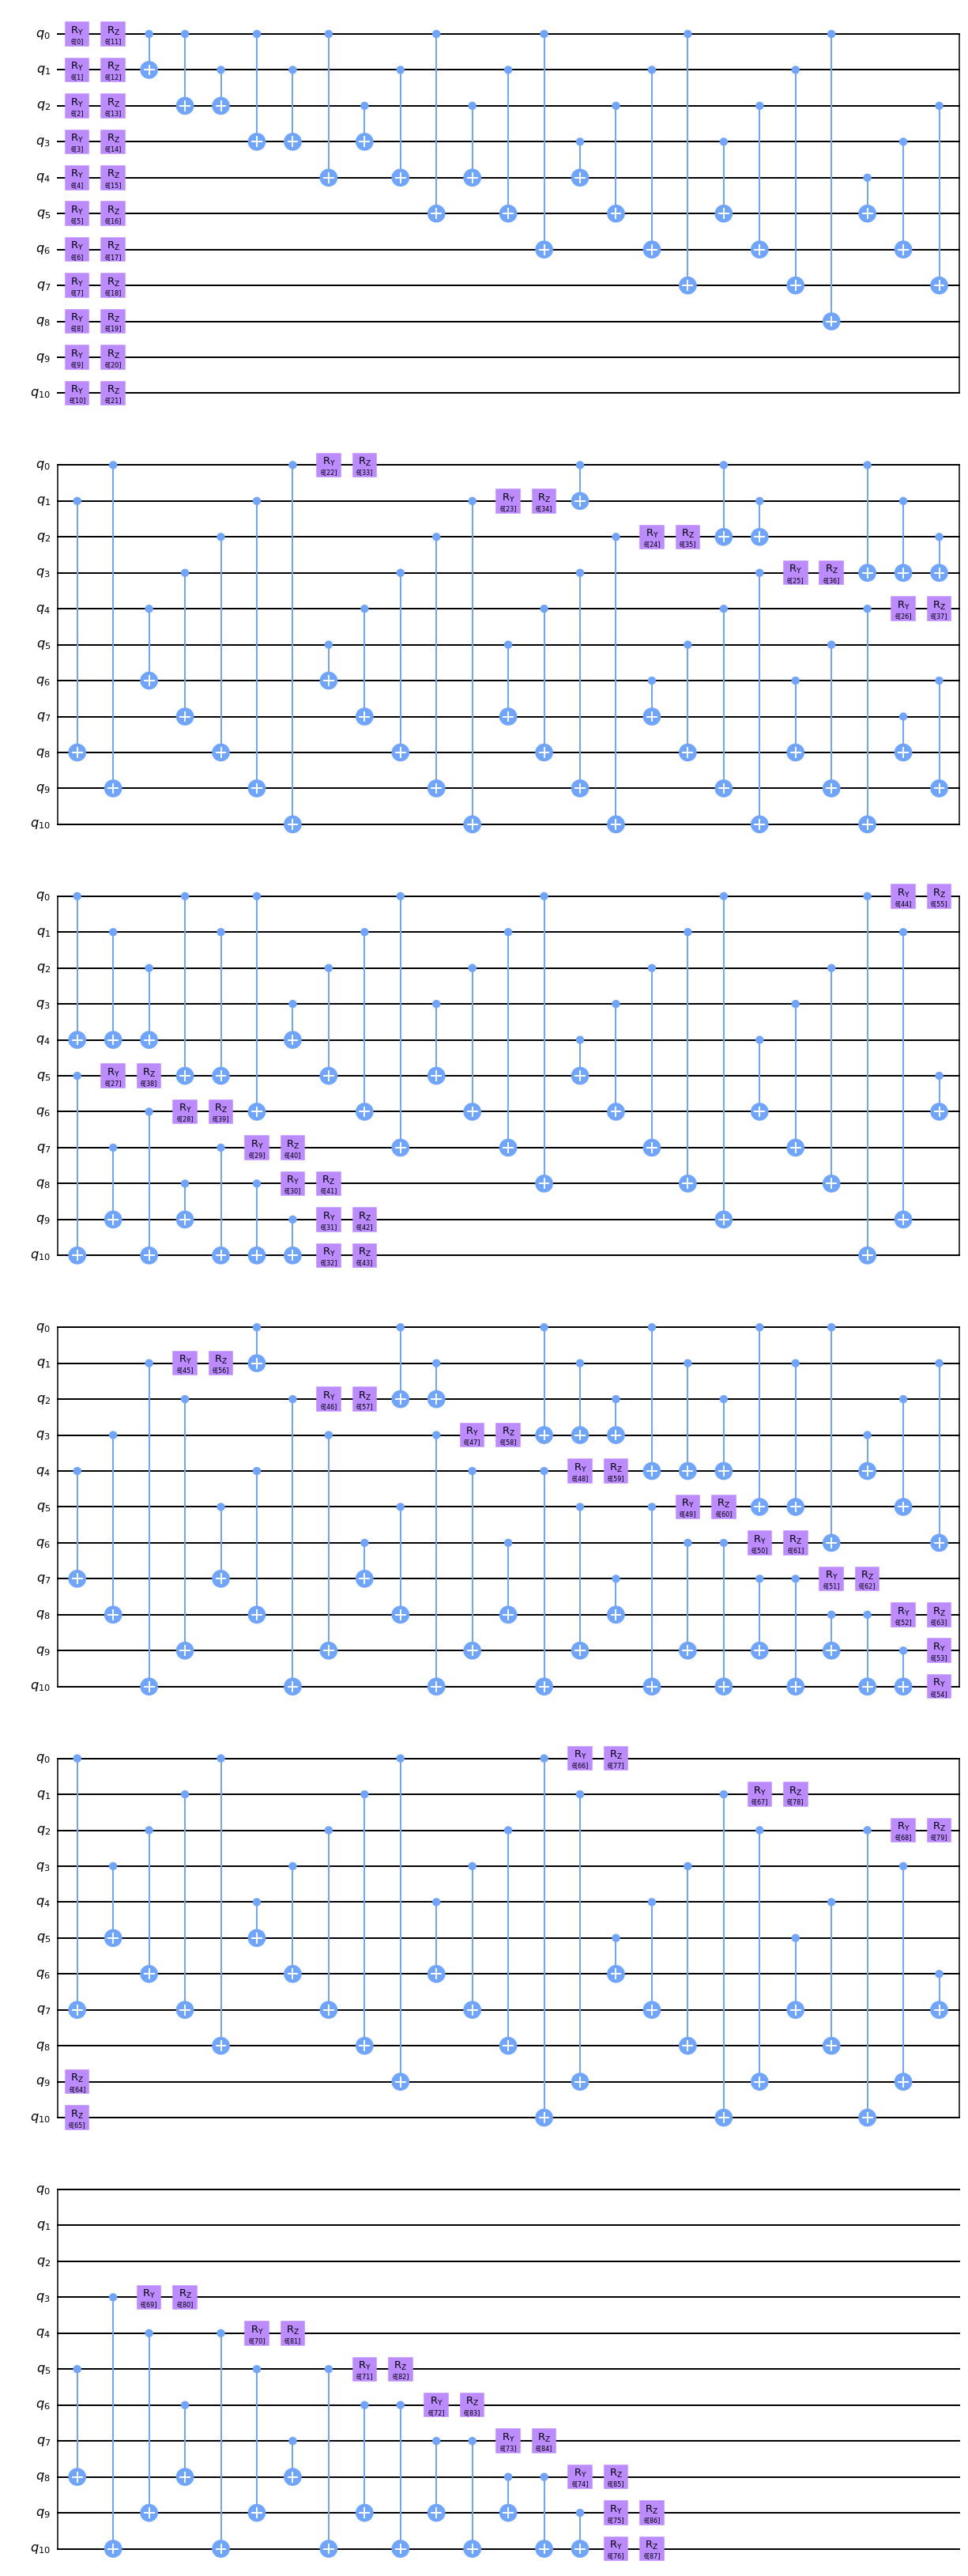

In [49]:
# BLOCK 7 - Running VQE and printing results. This is the same code as in Block 2. 
#The only difference is that here, the method is VQE and not the classical NumPyMinimumEigensolver.
# Did you get the same results as with the classical method?
calc = MinimumEigenOptimizer(method)
result = calc.solve(knapsack_problem.to_quadratic_program())
print('result:\n', result)
print('\nsolution:\n', knapsack_problem.interpret(result))
tunable_circuit.decompose().draw()